# Homework 6

Avinash Joshi

30 November, 2022

AMATH 422 Au 22

---
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy import integrate

---
---

## I

---

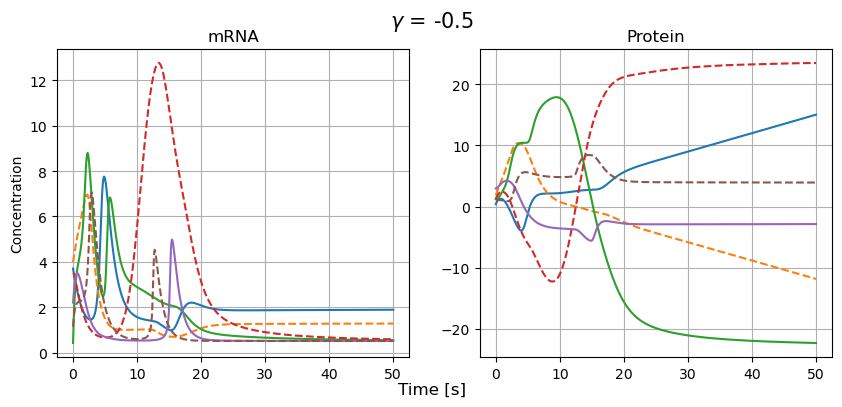

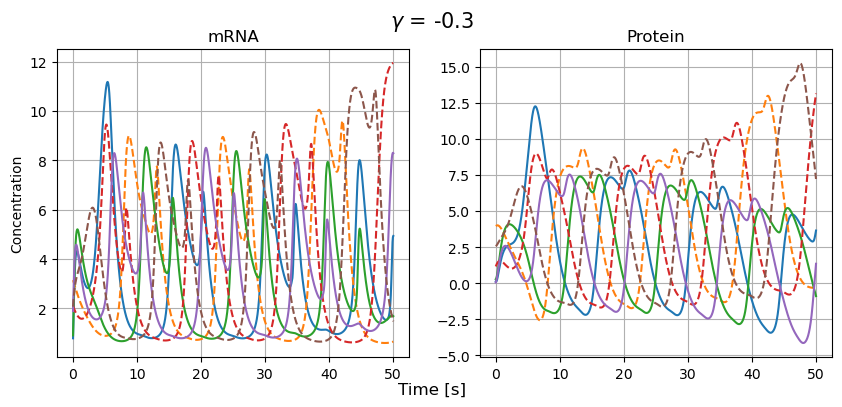

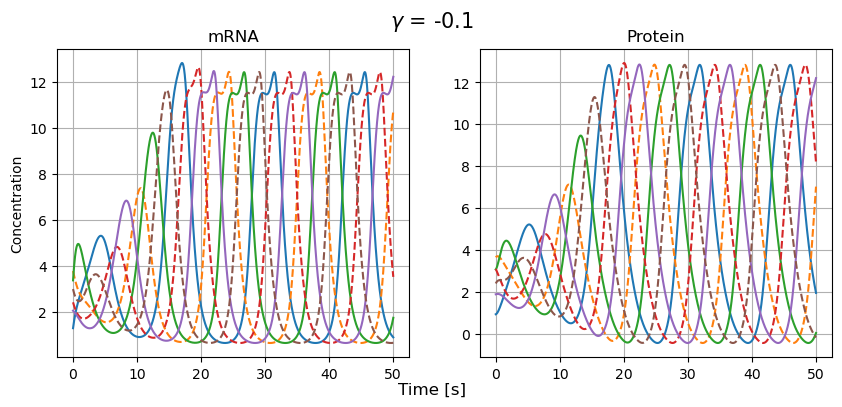

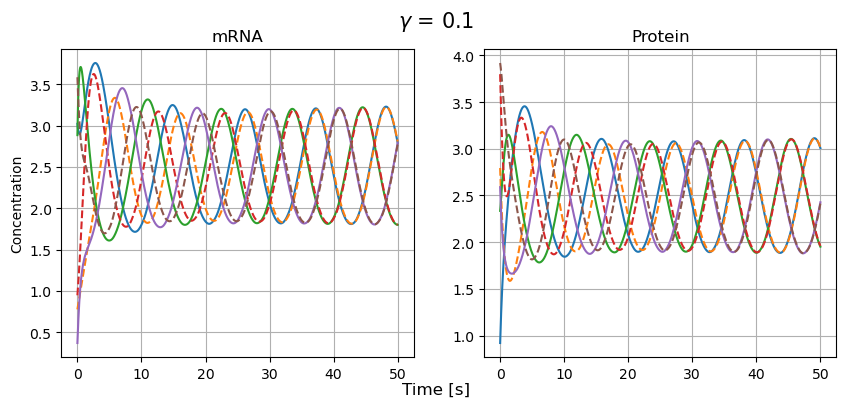

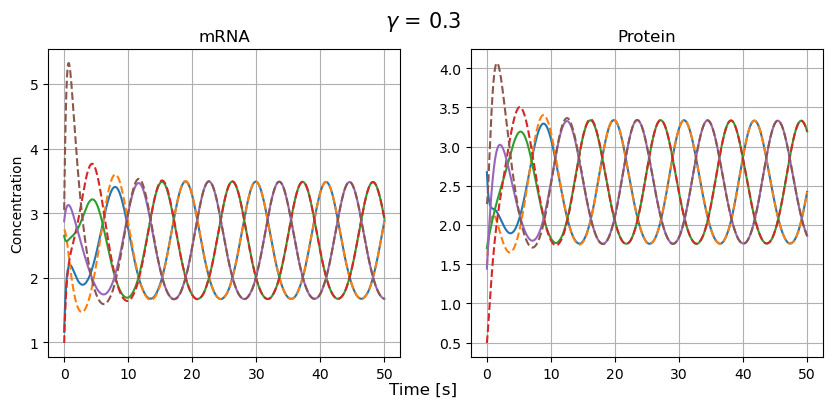

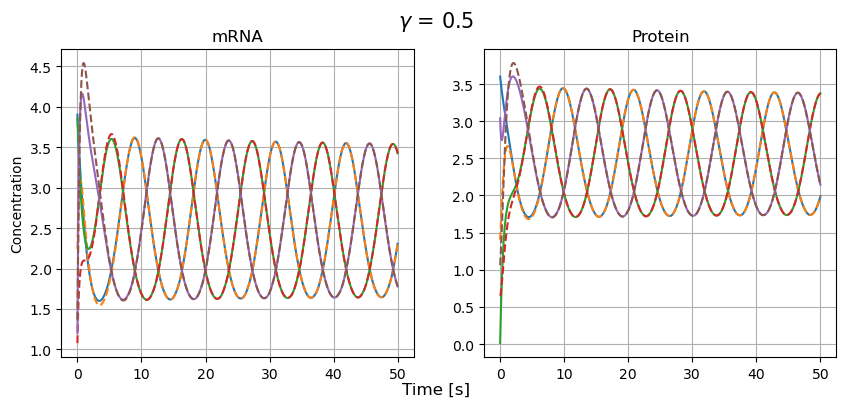

In [3]:
def repressilator_2(t,x,alpha,alpha0,beta,n,gamma):
    x_new = np.zeros(12) ###[m1,m2,m3,p1,p2,p3,n1,n2,n3,q1,q2,q3]
                         ###[0, 1,  2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    j = 2
    for i in range(3):
        x_new[i] = -x[i] + alpha/(1+(x[j%3 + 3])**n) + alpha0
        x_new[i+3] = -beta*(x[i+3] - x[i]) + gamma*(x[i+9] - x[i+3])
        x_new[i+6] = -x[i+6] + alpha/(1+x[j%3 + 9]**n) + alpha0
        x_new[i+9] = -beta*(x[i+9] - x[i+6]) + gamma*(x[i+3] - x[i+9])
        j = j+1
    return x_new

T = 50
tspan = np.arange(0,T+0.01,0.01)

alpha = 13
alpha0 = 0.5
beta = 1
n = 2

gammas = np.arange(-0.5,0.5+0.05,0.05)
g_sol = np.zeros((len(gammas),12,len(tspan)))

for i, gamma in enumerate(gammas):

    rng = np.random.default_rng()
    x0=rng.uniform(0,4,12)

    sol=sp.integrate.solve_ivp(repressilator_2, [0,T], x0, t_eval=tspan, 
                    args=(alpha,alpha0,beta,n,gamma), method = 'RK45')
    g_sol[i,:,:] = sol.y[:,:]

    if i%4 == 0:
        fig, ax = plt.subplots(1,2, figsize = (10,4))
        for j in range(3):
            ax[0].plot(sol.t, g_sol[i,j,:],'-')
            ax[0].plot(sol.t,g_sol[i,j+6,:],'--')
            ax[1].plot(sol.t,g_sol[i,j+3,:],'-')
            ax[1].plot(sol.t,g_sol[i,j+9,:],'--')
            ax[0].set_title('mRNA')
            ax[1].set_title('Protein')
            ax[0].set_ylabel('Concentration')
            ax[0].grid()
            ax[1].grid()
            fig.supxlabel('Time [s]')
            fig.suptitle(f'$\gamma$ = {np.round(gammas[i],decimals = 1)}',
                        fontsize = 15)
        plt.show()

For positive values of $\gamma$, i.e., $\gamma>0$, the two coupled oscillators synchronize to each other and oscillate with the same period and amplitude. A greater magnitude of $\gamma$ results in a faster synchornization, from synchronizing in $50$ seconds for $\gamma = 0.1$ to synchronizing in $10$ seconds for $\gamma = 0.5$. For negative values of $\gamma$, i.e., $\gamma < 0$, impossible behavior takes place as protein concentrations are negative, but, ignoring the negative concentartions, the two oscillators are pushed out of sync and phase where one oscillator's ampltiude grows positively while the other's amplitude grows negatively. 

Looking at the differential equations, Equations $(2)$ and $(4)$, with positive values of $\gamma$, when the right parentheses, $\gamma(q_i - p_i)$ or $\gamma(p_i - q_i)$, is negative, the protein production will decrease due to there being more of that specific protein for one oscillator than the other. This slows the production of protein in one oscillator while speeding up protein production in the other as its right parentehses will be of opposite sign. For negative values of $\gamma$, the behavior is flipped; if one oscillator has a greater concentration of a specific protein, it will speed up its production while the other oscillators will continue to decrease negatively.

---
---

## II

---

### 7a

For the permanent switch discussed in Figure $7a$, the differential equations for $X$ and $Y$ must have $X=Y=1$ be a stable fixed point and, when a positive $Z$ signal is induced, both $X$ and $Y$ are produced until they stop at $X=Y=1$. Therefore, the following set of differential equations,
$$\begin{cases} 
    \frac{dX}{dt} = (Y + Z)(1 - X) \\ 
    \frac{dY}{dt} = (X + Z)(1 - Y), 
\end{cases}$$
are introduced to describe the dynamics of Figure $7a$, a double-positive-feedback loop.

When $Z>0$, $\dfrac{dX}{dt}$ and $\dfrac{dY}{dt}$ are postitive thus increasing $X$ and $Y$. Then, as $Z$ stops at $T=4$, since $X$ and $Y$ are positive, $\dfrac{dX}{dt}$ and $\dfrac{dY}{dt}$ are still positive, though it begins to decrease as the $(1-X)$ and $(1-Y)$ term causes $\dfrac{dX}{dt}$ and $\dfrac{dY}{dt}$ to become $0$; thus, under the presence of $Z$, both $X$ and $Y$ begin to increase and, after $Z$ has stopped, continue to increase as they begin to positively affect one another. This commits the presence of $Z$ to memory, i.e., $X = Y = 1$ thereon.

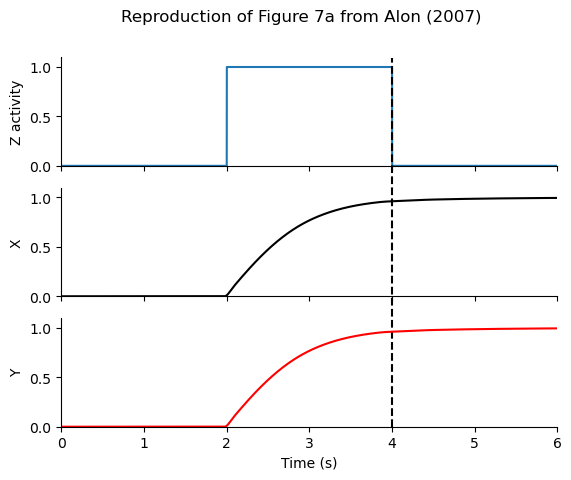

In [9]:
T_max = 6
dt = 0.0001

tspan = np.arange(0,T_max+dt,dt)
zspan = np.heaviside(tspan-2,1) - np.heaviside(tspan-4,1)

def xy_activator(t,x):
    z = np.heaviside(t-2,1) - np.heaviside(t-4,1) ## z concentration
    dx = (x[1] + z)*(1-x[0])
    dy = (x[0] + z)*(1-x[1])
    return [dx,dy]

y0 = [0,0]
sol = sp.integrate.solve_ivp(xy_activator, [0,T_max], y0=y0, 
                             t_eval = tspan, method = 'RK45')

fig, ax = plt.subplots(3,1, sharex = True)
ax[0].plot(tspan,zspan)
ax[0].set_ylabel('Z activity')
ax[1].plot(sol.t,sol.y[0,:], 'k-')
ax[1].set_ylabel('X')
ax[2].plot(sol.t,sol.y[1,:], 'r-')
ax[2].set_ylabel('Y')
ax[2].set_xlabel('Time (s)')
ax[2].set_xlim([0,T_max])
ax[2].axvline(x = 4, ymin = 0, ymax = 3.39, c='k', linestyle='--', zorder = 0, clip_on = False)
for i in range(3):
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].set_ylim([0,1.1])
fig.suptitle('Reproduction of Figure 7a from Alon (2007)')
plt.show()

---

### 7b

For the other permanent switch discussed in Figure $7b$, the differential equations for $X$ and $Y$ must have $X=1$ and $Y=0$ be fixed points representing the switch in state from $\texttt{ON}$ to $\texttt{OFF}$ for $Y$ and $\texttt{OFF}$ to $\texttt{ON}$ for $X$ when acted upon by $Z$. Therefore, the following set of differential equations,
$$\begin{cases} 
    \frac{dX}{dt} = (1 + Z - Y)(1 - X) \\ 
    \frac{dY}{dt} = (Y - Z - 1)(1 - X), 
\end{cases}$$
are introduced to describe the dynamics of Figure $7b$, a regulated feedback motif with a double-negative-feedback loop.

When $Z$ is turned on, i.e., $Z=1$, it "lifts" the burden in the first parentheses allowing $X$ and $Y$ to change as $Z$ begins to repress $Y$ and activate $X$. From here, $X$ can then take over $Z$'s responsibility of repressing $Y$, forcing $Y$ to $0$. Looking at $\dfrac{dX}{dt}$'s first set of parentheses, $(1+Z-Y)$, since we ensure that $Y=1$ at the start, $\dfrac{dX}{dt} \equiv 0$ when $Z=0$, as $(1+0-1) = 0$. When $Z=1$, however, $(1+Z-Y)$ is now open to change since $(1+1-1) = 1$. Now, $X$ is free to increase until it is stopped by $(1-X)$ and is irreversibly locked into place at $X=1$. Similarly but reversed, for $\dfrac{dY}{dt}$, $(Y-Z-1) = 0$ when $Z=0$ but becomes $-1$ when $Z=1$ causing $Y$ to decrease and stabilize at $Y=0$ by the $(1-X)$ term. This flips the state of $X$ and $Y$ from $\texttt{OFF}$ to $\texttt{ON}$ and vis-versa.

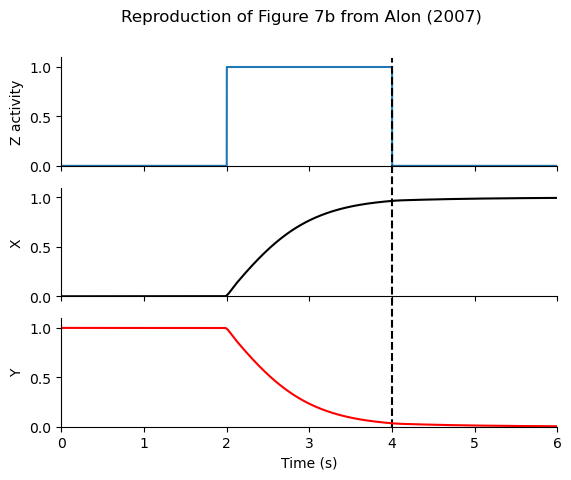

In [5]:
T_max = 6
dt = 0.0001

tspan = np.arange(0,T_max+dt,dt)
zspan = np.heaviside(tspan-2,1) - np.heaviside(tspan-4,1)

def xy_repressor(t,x):
    z = np.heaviside(t-2,1) - np.heaviside(t-4,1)
    dx = (1 + z - x[1])*(1-x[0])
    dy = (x[1] - (z + 1))*(1-x[0])
    return [dx,dy]

y0 = [0,1]
sol = sp.integrate.solve_ivp(xy_repressor, [0,T_max], y0=y0, t_eval = tspan, method = 'RK45')

fig, ax = plt.subplots(3,1, sharex = True)
ax[0].plot(tspan,zspan)
ax[0].set_ylabel('Z activity')
ax[1].plot(sol.t,sol.y[0,:], 'k-')
ax[1].set_ylabel('X')
ax[2].plot(sol.t,sol.y[1,:], 'r-')
ax[2].set_ylabel('Y')
ax[2].set_xlabel('Time (s)')
ax[2].set_xlim([0,T_max])
ax[2].axvline(x = 4, ymin = 0, ymax = 3.39, c='k', linestyle='--', zorder = 0, clip_on = False)
for i in range(3):
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].set_ylim([0,1.1])
fig.suptitle('Reproduction of Figure 7b from Alon (2007)')
plt.show()